In [1]:
from patchedimage import PatchedImage
from utilities import *

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done
iteration 21 done
iteration 22 done
iteration 23 done
iteration 24 done
iteration 25 done
iteration 26 done
iteration 27 done
iteration 28 done
iteration 29 done
iteration 30 done
iteration 31 done
iteration 32 done
iteration 33 done
iteration 34 done
iteration 35 done
iteration 36 done
iteration 37 done
iteration 38 done
iteration 39 done
iteration 40 done
iteration 41 done
iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done


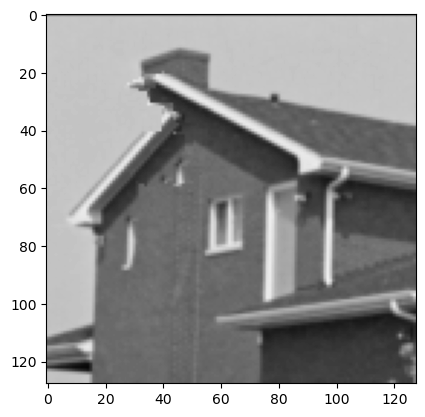

In [2]:
imgp = PatchedImage("images/maison-petit.tif",4)
masque = masque_carre((40,100),(80,110),imgp.img.shape)
masque = masque_circulaire((40,40),20,imgp.img.shape)
imgp.set_masque(leaf_size=128,draw=False,masque=masque)
imgp.set_priorities()
imgp.show_img()
imgp.reconstruction_auto()
imgp.show_img()

In [3]:
"""
plt.imshow(imgp.zone)
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[0])
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[1])
plt.colorbar()
plt.show()
"""

'\nplt.imshow(imgp.zone)\nplt.colorbar()\nplt.show()\nplt.imshow(imgp.gradient[0])\nplt.colorbar()\nplt.show()\nplt.imshow(imgp.gradient[1])\nplt.colorbar()\nplt.show()\n'

In [4]:
"""
i,j = imgp.find_max_priority()
imgp.reconstruction((i,j))
imgp.set_priorities()
plt.imshow(imgp.zone)
"""

'\ni,j = imgp.find_max_priority()\nimgp.reconstruction((i,j))\nimgp.set_priorities()\nplt.imshow(imgp.zone)\n'

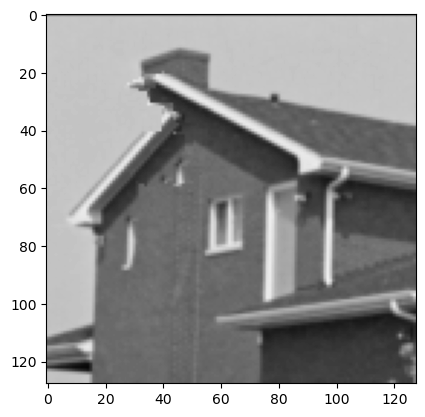

In [5]:
imgp.show_img()